# Guassian Mixtures Models, Density Based Spacial Clustering of Applications with Noise (DBSCAN)
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

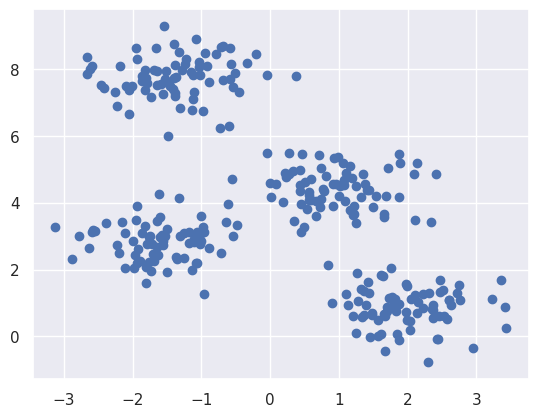

In [2]:
X, y = make_blobs(n_samples = 300, cluster_std = 0.6, centers = 4, random_state = 0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Text(0.5, 0, 'Número de grupos')

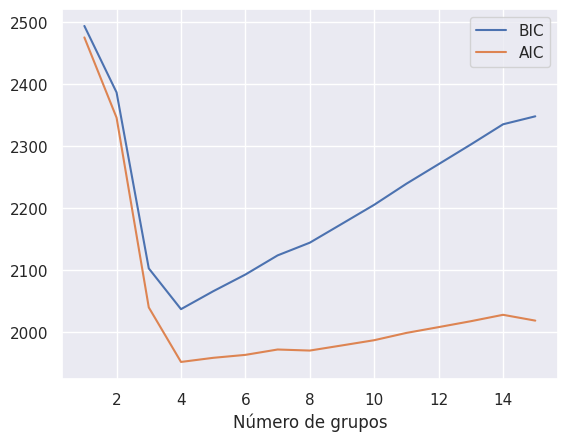

In [3]:
# Número de grupos
n_grupos = np.arange(1, 16)
# Generar 15 modelos entrenados
modelos = [GaussianMixture(n, covariance_type = 'full', random_state = 0).fit(X) for n in n_grupos]
plt.plot(n_grupos, [m.bic(X) for m in modelos], label = 'BIC')
plt.plot(n_grupos, [m.aic(X) for m in modelos], label = 'AIC')
plt.legend(loc = 'best')
plt.xlabel('Número de grupos')

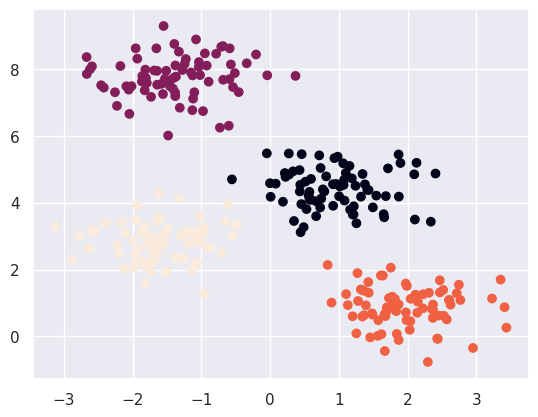

In [4]:
# Modelo con 4 grupos
gmm = GaussianMixture(n_components = 4)
gmm.fit(X)
y_pred = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_pred)
plt.show()

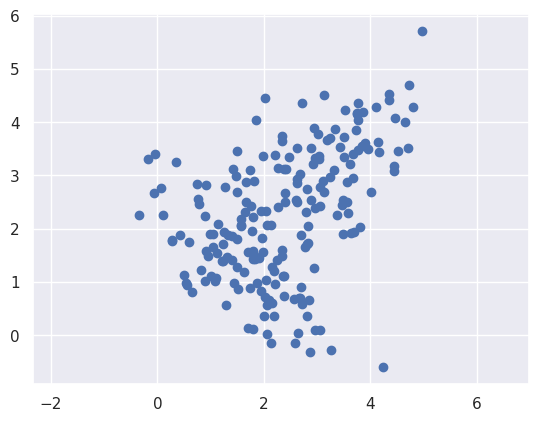

In [5]:
# Ejemplo 2
X_train = np.load('data.npy')
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.axis('equal')
plt.show()

In [6]:
gmm = GaussianMixture(n_components = 2)
gmm.fit(X_train)
print('Medias: \n', gmm.means_)
print('\nCovarianzas: \n', gmm.covariances_)

Medias: 
 [[1.60629419 1.3470999 ]
 [3.0363831  3.09828041]]

Covarianzas: 
 [[[ 0.75275611 -0.5054196 ]
  [-0.5054196   0.74286061]]

 [[ 0.8465178   0.38644336]
  [ 0.38644336  0.73395863]]]


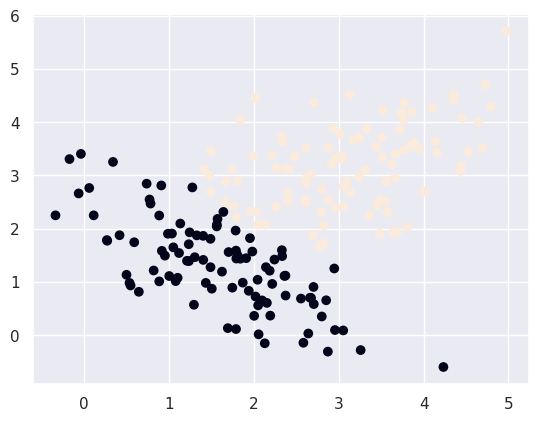

In [7]:
y_pred = gmm.predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_pred)
plt.show()

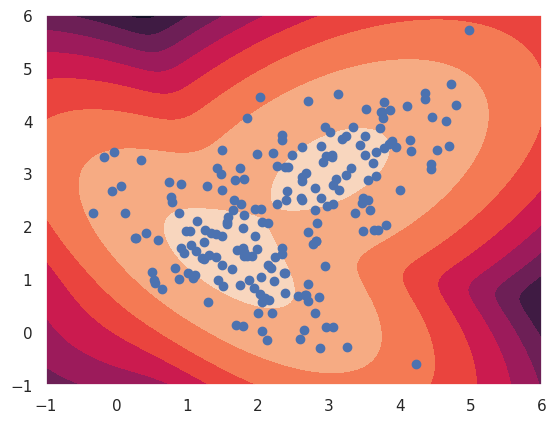

In [8]:
X, Y = np.meshgrid(np.linspace(-1, 6, 500), np.linspace(-1, 6, 500))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((500, 500))
# Curvas de nivel
plt.contourf(X, Y, Z)
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.show()

Los puntos fuera del área *principal* son anomalías.

In [9]:
import pandas as pd
from collections import Counter
from sklearn.cluster import DBSCAN

In [10]:
df = pd.read_csv('winequality.csv')
display(df.shape, df.head(2))

(6463, 13)

,type1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [11]:
data = df.iloc[:, 1:3]
data.head(2)

,fixed acidity,volatile acidity
0,7.0,0.27
1,6.3,0.30


In [14]:
# Modelo DBSCAN
dbs = DBSCAN(eps = 0.2, min_samples = 20).fit(data)
Counter(dbs.labels_)

Counter({np.int64(0): 6281,
         np.int64(-1): 117,
         np.int64(1): 40,
         np.int64(2): 25})

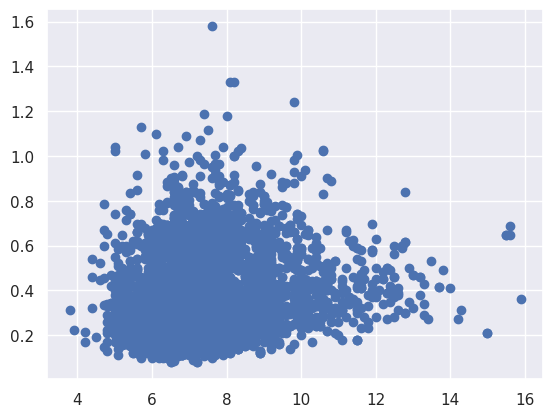

In [17]:
plt.scatter(data['fixed acidity'], data['volatile acidity'])
plt.show()

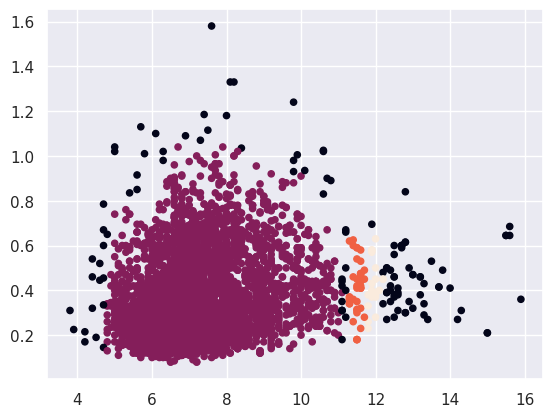

In [20]:
plt.scatter(data['fixed acidity'], data['volatile acidity'], c = dbs.labels_, s = 20)
plt.show()